In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] =(8, 5)

# 0. Seaborn 개요
* matplotlib보다 많이 쓰는 이유는 **통계 기반 plot**을 손쉽게 그릴 수 있기 때문
* matplotlib으로 집계된 데이터 (통계 기반 데이터)를 시각화를 하고 싶다면?
  * groupby 또는 pivot_table을 만들어서 시각화를 해야합니다.
  * 카테고리별 분류를 하기 위해서는 plot을 각각 그려야 한다.
* **실무에서는**
  * 단순하게 임의의 데이터만을 시각화해서 빠르게 보고 싶을 때 : matplotlib, seaborn
    * 통계적인 시각화가 필요 없을 때
  * 데이터 프레임 기반의 통계를 사용한 시각화를 해보고 싶을 때는 seaborn


## 0-1. Seaborn에서만 제공되는 통계기반 plot

In [ ]:
# seaborn에서 제공하는 샘플 데이터셋 가져오기
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**tips : 식당 데이터셋**
* `total_bill` : 지불 금액
* `tip` : 팁
* `sex` : 성별 ( 남자가 지불했는지, 여자가 지불했는지 )
* `smoker` : 지불한 사람이 흡연자인지, 비흡연자인지
* `day` : 요일
* `time` : 식사 때( 점심, 저녁 )
* `size` : 몇명이서 식사를 했는지


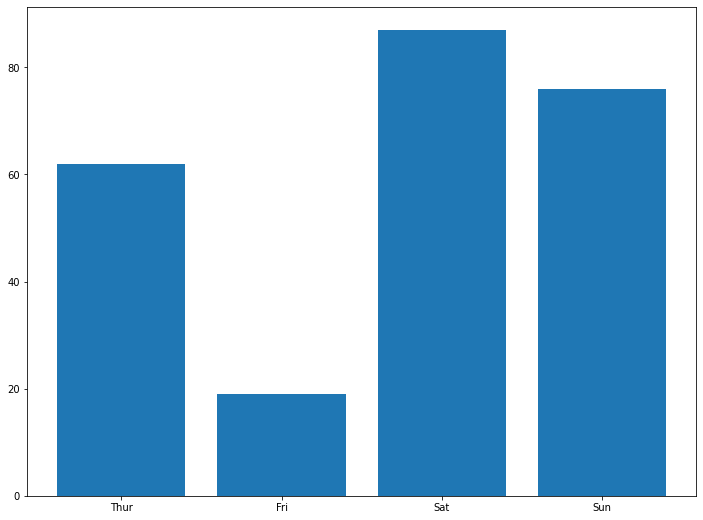

In [ ]:
# 1. 요일별 식사한 개수 일요일에는 몇 테이블이 먹었고, 토요일에는 몇 테이블이 먹었고.
df_by_day_count = tips.groupby("day")["total_bill"].count()
plt.bar(df_by_day_count.index, df_by_day_count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


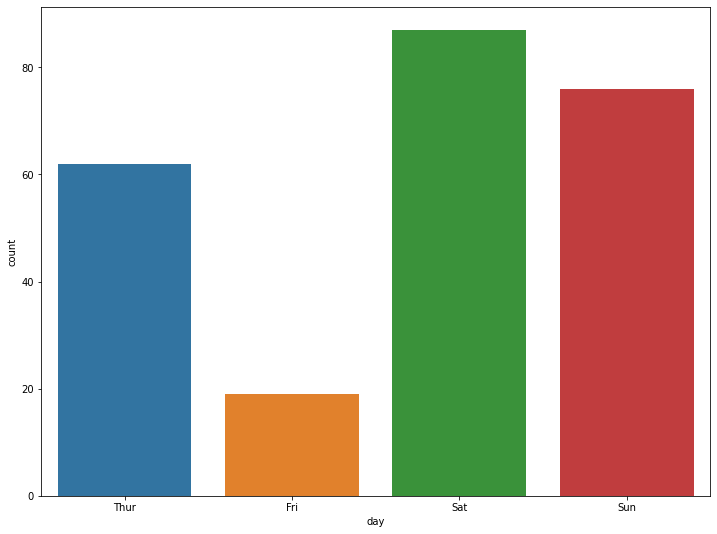

In [ ]:
# seaborn을 활용하면?
sns.countplot(tips['day'])
plt.show()

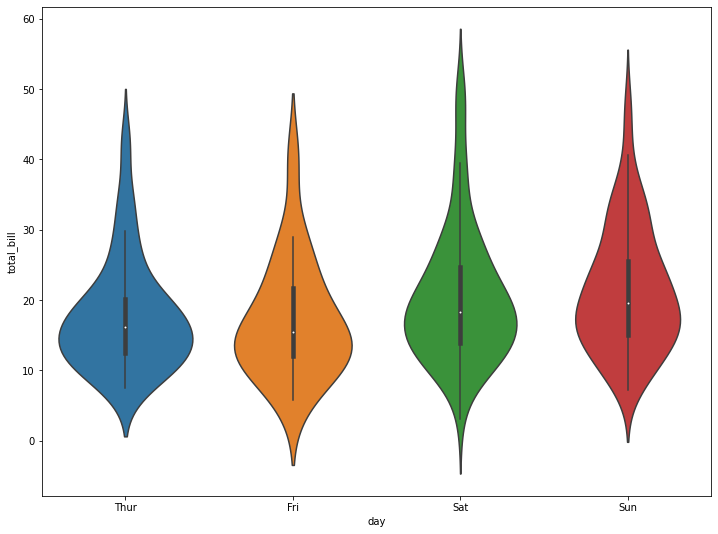

In [ ]:
sns.violinplot(x='day', y='total_bill', data=tips) # x : x축에 표시할 컬럼, y : y축에 표시할 컬럼, data : 데이터 프레임
plt.show()

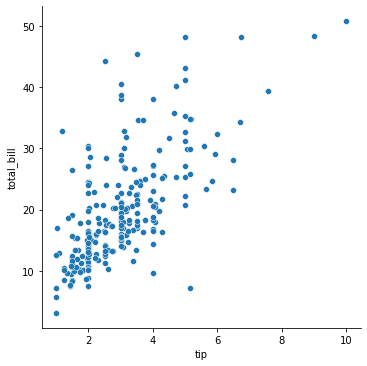

In [ ]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.show()

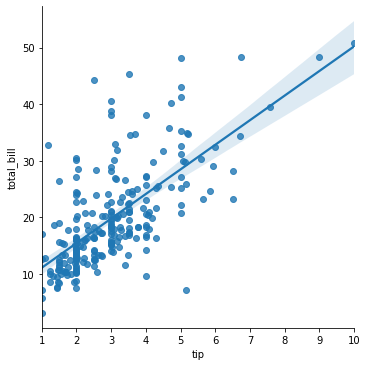

In [ ]:
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.show()

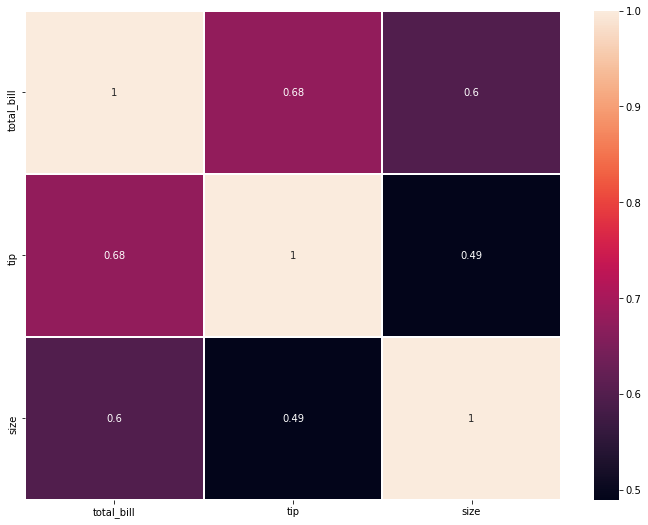

In [ ]:
sns.heatmap(tips.corr(), annot=True, linewidths=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


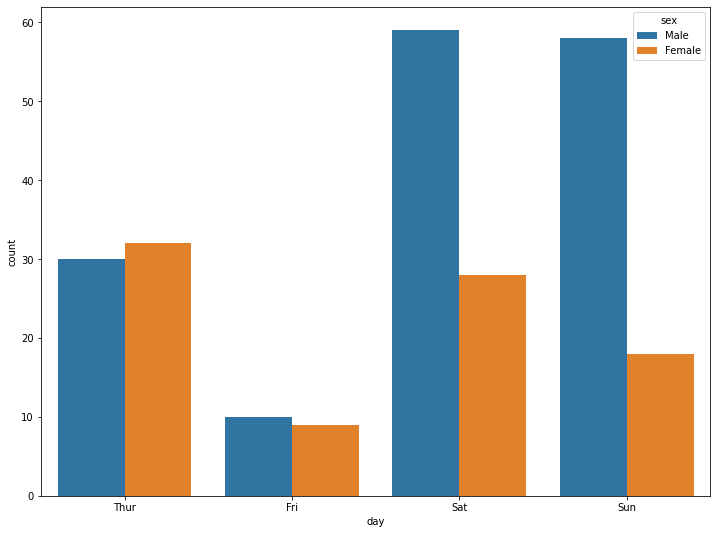

In [ ]:
# seaborn을 활용하면?
sns.countplot(tips['day'], data=tips, hue='sex')
plt.show()

## 0-2. 다양하고 아름다운 스타일링

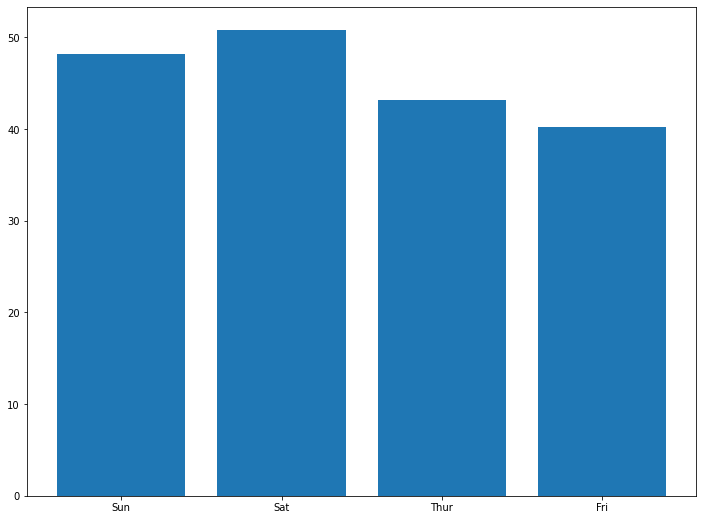

In [ ]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

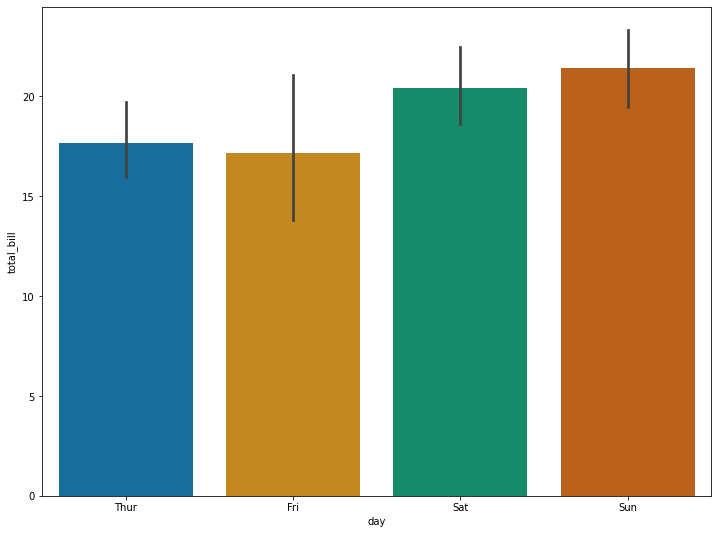

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips, palette='colorblind')
plt.show()

## 0-2. 컬러 팔레트

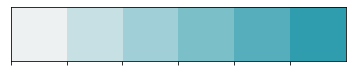

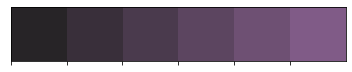

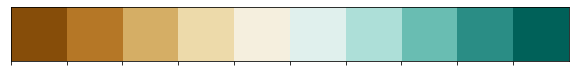

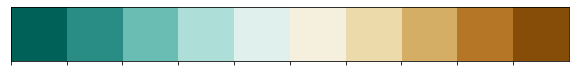

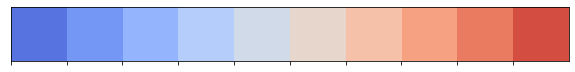

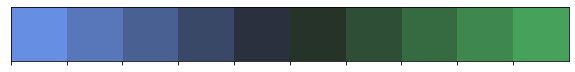

In [ ]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

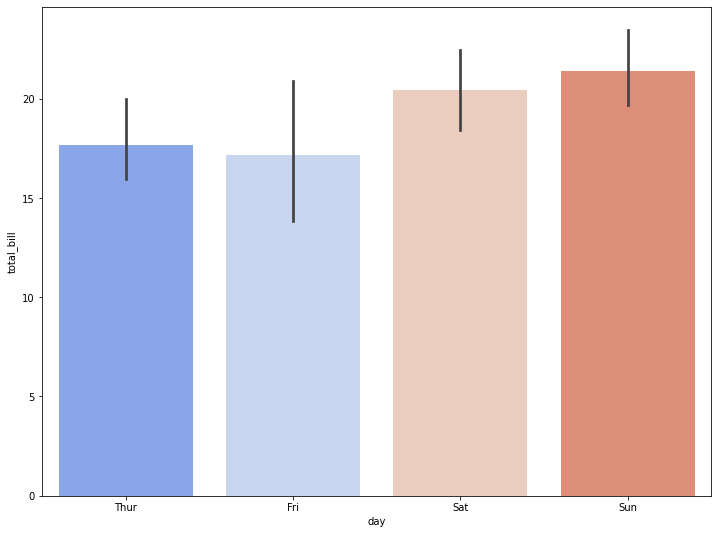

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips, palette="coolwarm")
plt.show()

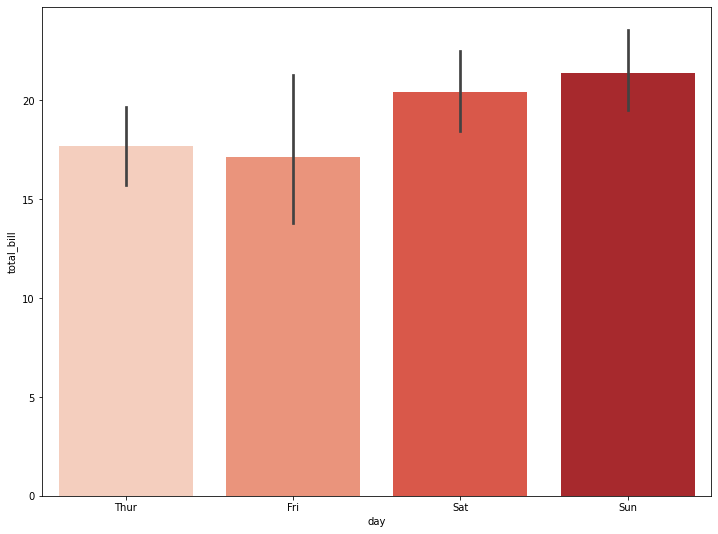

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips, palette="Reds")
plt.show()

## 0-4. pandas 데이터 프레임과 호환성이 좋다.

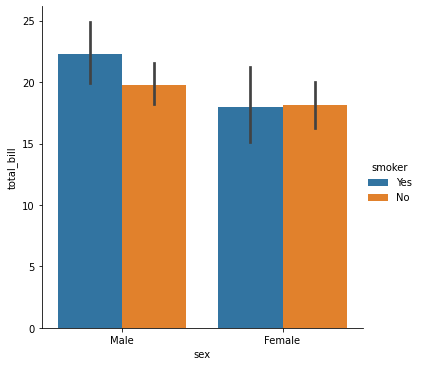

In [ ]:
sns.catplot(
    x='sex',
    y='total_bill',
    data=tips,
    kind='bar',
    hue='smoker'
)

plt.show()

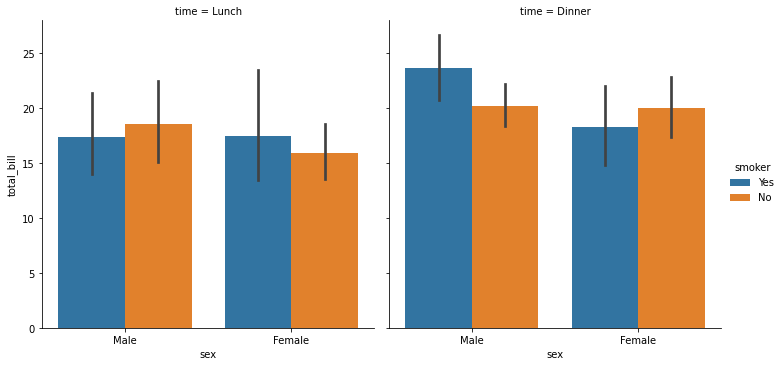

In [ ]:
sns.catplot(
    x='sex',
    y='total_bill',
    data=tips,
    kind='bar',
    hue='smoker',
    col="time" # 그래프 자체를 분할 주기
)
plt.show()

실습용 데이터셋
* `titanic` : 타이타닉 사망자 / 생존자 데이터셋
* `tips` : 식당 데이터셋

In [ ]:
titanic = sns.load_dataset('titanic')
tips    = sns.load_dataset('tips')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**타이타닉 데이터셋 설명**
* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 + 배우자 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

**식당 데이터셋 설명**
* `total_bill` : 지불 금액
* `tip` : 팁
* `sex` : 성별 ( 남자가 지불했는지, 여자가 지불했는지 )
* `smoker` : 지불한 사람이 흡연자인지, 비흡연자인지
* `day` : 요일
* `time` : 식사 때( 점심, 저녁 )
* `size` : 몇명이서 식사를 했는지


# 1. Countplot
* 항목별 개수를 세어주는 시각화 방법
* 알아서 컬럼을 구성하고 있는 value들을 구분해서 보여줍니다.

In [ ]:
sns.set(style='darkgrid') # 모든 시각화 배경을 회색 그리드로 보여주는 옵션

## 1-1. 기본 그리기

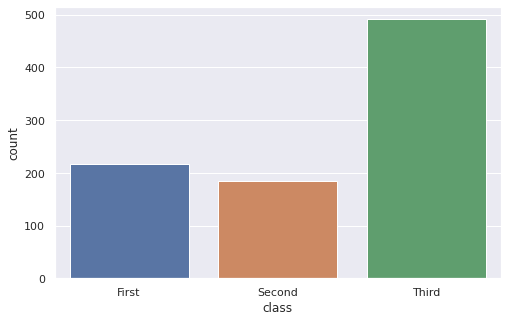

In [ ]:
sns.countplot(x='class', data=titanic) # titatnic 데이터셋에서 class(좌석등급)마다의 개수를 시각화
plt.show()

`hue`라는 옵션을 활용해서 원하는 카테고리별 비교 시각화가 가능

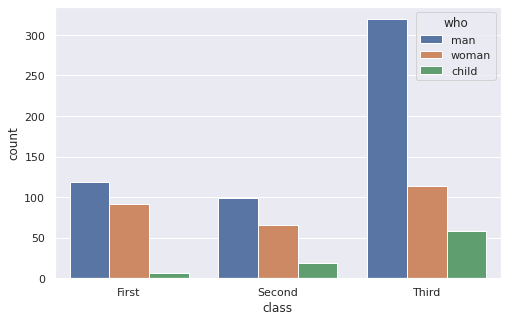

In [ ]:
sns.countplot(x='class', data=titanic, hue='who')
plt.show()

## 1-2. 가로로 그리기

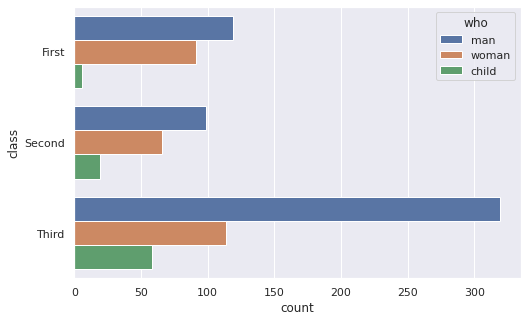

In [ ]:
sns.countplot(y='class', hue='who', data=titanic)
plt.show()

## 1-3. 색상 팔레트 지정하기

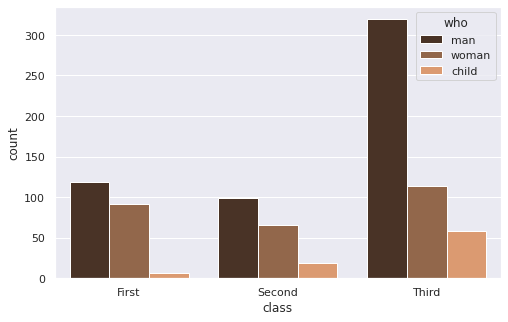

In [ ]:
sns.countplot(x='class', hue='who', data=titanic, palette='copper')
plt.show()

# 2. distplot (상당히 많이 씁니다.)
* matplotlib의 `hist` 그래프 + `kdeplot`을 통합한 그래프
* **분포와 밀도**를 확인할 수 있다.

In [ ]:
# 임의의 샘플 데이터 생성
N = 100000

x = np.random.randn(N) # 10만개의 정규분포 랜덤값

## 2-1. 기본 distplot 그리기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


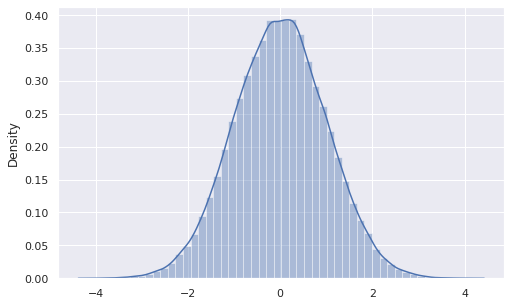

In [ ]:
sns.distplot(x)
plt.show()

## 2-2 데이터가 series인 경우

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


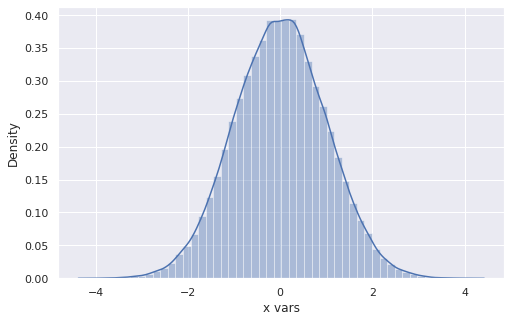

In [ ]:
x = pd.Series(x, name="x vars")
sns.distplot(x)
plt.show()

### 데이터셋에서 그리기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


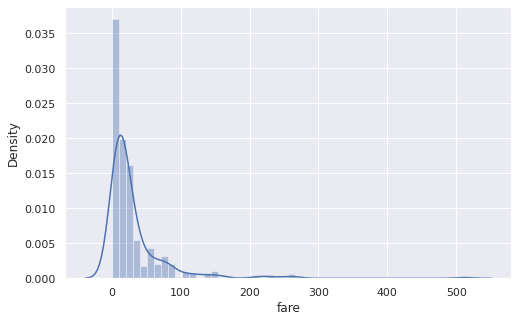

In [ ]:
# 타이타닉 데이터셋에서 요금 distplot 그려보기
sns.distplot(titanic["fare"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


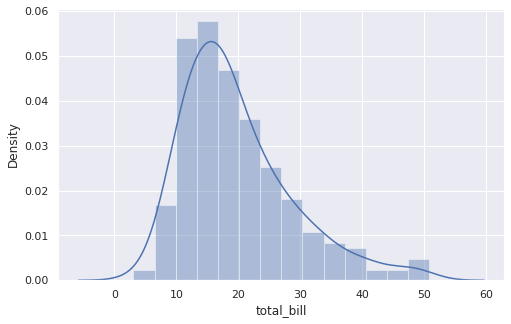

In [ ]:
# tips의 total_bill distplot 그려보기
sns.distplot(tips['total_bill'])
plt.show()

## 2-3. rugplot
`rug`는 `rugplot`이라고도 불리며, 데이터의 위치를 x축 위에 **작은 선분(rug)으로 나타내어서, 데이터의 위치와 분포를 보여준다.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


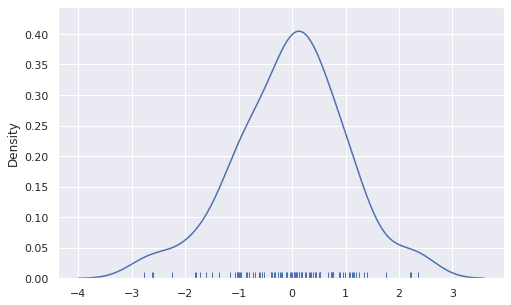

In [ ]:
x = np.random.randn(100)

sns.distplot(x, rug=True, hist=False, kde=True)
plt.show()

## 2-4. kde(kernel density estimate)
* 커널 밀도 추정 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


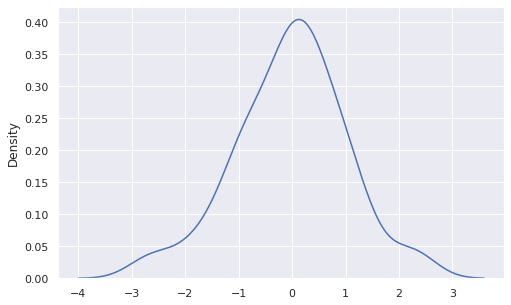

In [ ]:
sns.distplot(x, rug=False, hist=False, kde=True)
plt.show()

## 2-5. 가로로 표현하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


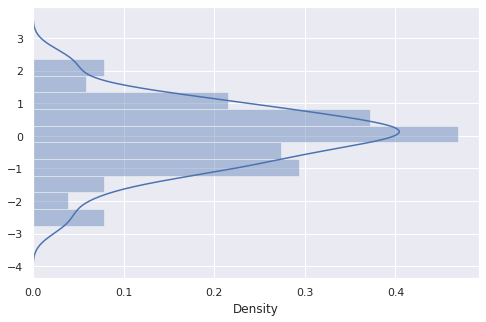

In [ ]:
sns.distplot(x, vertical=True)
plt.show()

## 2-6. 컬러 변경

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


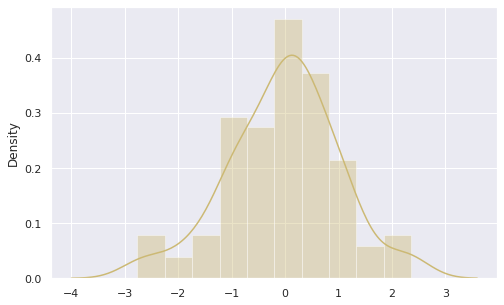

In [ ]:
sns.distplot(x, color='y')
plt.show()

# 3.heatmap
* 데이터의 크기를 색상의 농도로 표현해주는 기법

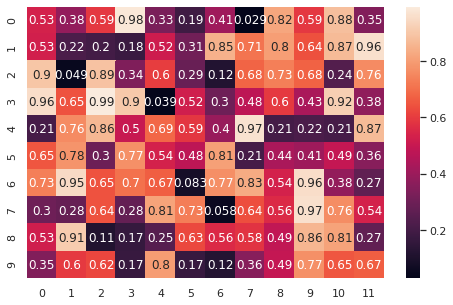

In [ ]:
x = np.random.rand(10, 12)
sns.heatmap(x, annot=True)
plt.show()

## 3-2. pivot table을 활용하여 히트맵 그리기

In [ ]:
pivot = tips.pivot_table(index='day', columns='size', values='tip') # 요일별 방문인원의 팁의 평균
pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


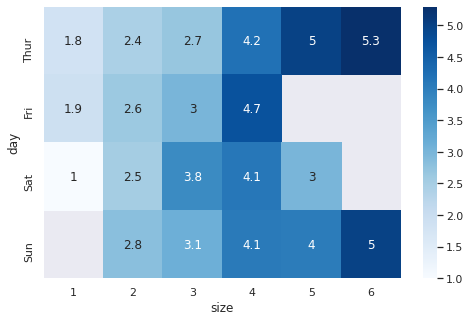

In [ ]:
# annot : 히트맵 위에 그려질 숫자
sns.heatmap(pivot, cmap='Blues', annot=True)
plt.show()

## 3-3. correlation(상관관계)를 시각화

pandas의 corr() 함수는 데이터들끼리의 상관관계를 보여준다.

In [ ]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


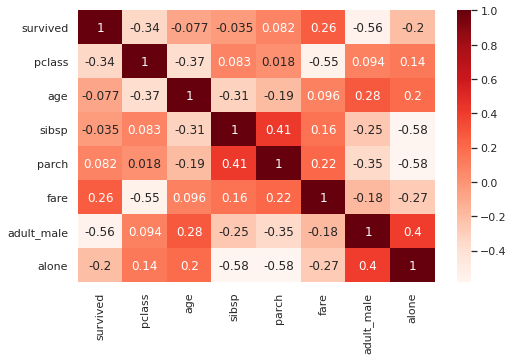

In [ ]:
sns.heatmap(titanic.corr(), annot=True, cmap="Reds")
plt.show()

# 4.pairplot
* pairplot은 그리드 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그린다.
  * 집합(데이터)의 조합
    - `tips` & `total_bill`의 조합
    - `size` & `total_bill`의 조합
    - `tips` & `size`의 조합
* 숫자형 column에 대해서만 그려준다.

## 4-1. 기본 pairplot

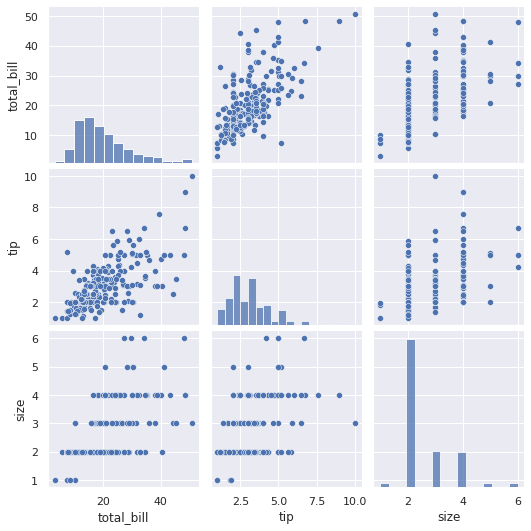

In [ ]:
sns.pairplot(tips)
plt.show()

## 4-2. hue 옵션으로 특성 구분

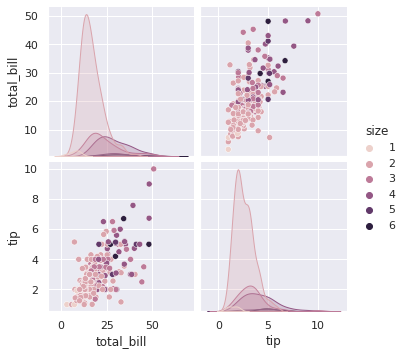

In [ ]:
sns.pairplot(tips, hue='size')
plt.show()

## 4-3. 컬러 팔레트 적용

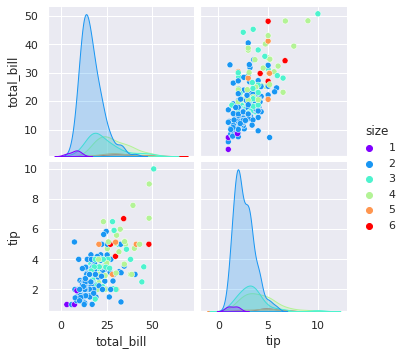

In [ ]:
sns.pairplot(tips, hue='size', palette='rainbow')
plt.show()

## 4-3. 사이즈 적용

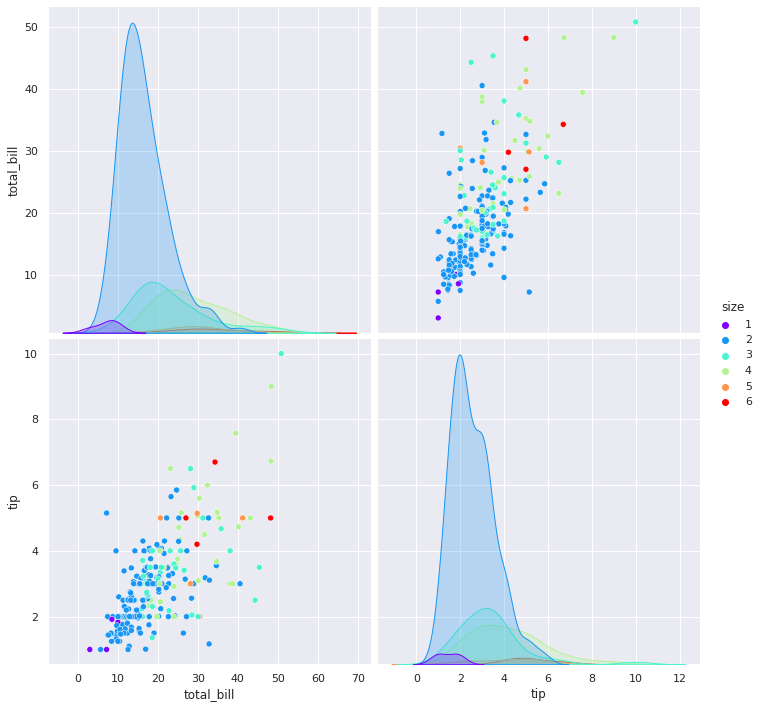

In [ ]:
sns.pairplot(tips, hue='size', palette='rainbow', height=5,)
plt.show()

## 5. violinplot
* column에 대한 데이터의 **비교 분포도**를 확인
  * kde와 거의 비슷하지만 그래프가 대칭으로 되어있다.
  * kde는 density(밀집도), violinplot은 실제 값의 빈도
* 곡선으로 되어있는 뚱뚱한 부분은 데이터의 분포
* 양쪽 끝 뾰족한 부분은 데이터의 최소와 최대를 나타냅니다.

## 5-1. 기본 violinplot 그리기

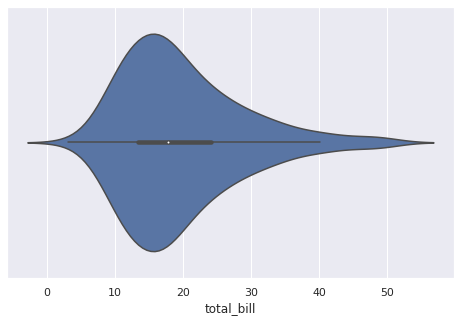

In [ ]:
sns.violinplot(x=tips['total_bill'])
plt.show()

## 5-3. 비교 분포 확인
x, y축을 동시에 지정하여 바이올린을 분할하여 **비교 분포**를 확인

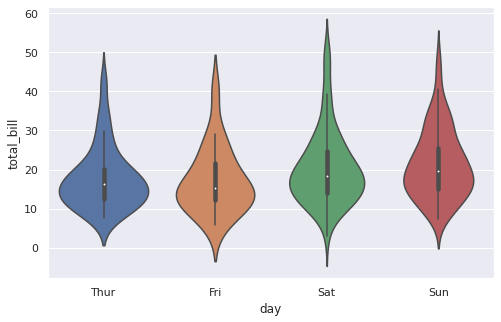

In [ ]:
# 요일"별" 지불 가격의 비교 분포를 보고 싶다.
# x : day, y = total_bill
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

## 5-3. 가로로 뉘인 violinplot

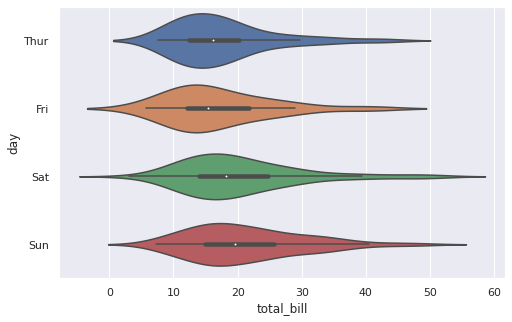

In [ ]:
sns.violinplot(y='day', x='total_bill', data=tips)
plt.show()

## 5-4. hue 옵션으로 비교
* hue 옵션을 사용하지 않으면 바이올린이 대칭이기 때문에 KDE로 보는 것과 큰 차이가 없다.
* hue 옵션을 부여하면 **단일 컬럼에 대한 바이올린 모양의 비교**를 할 수 있다.  

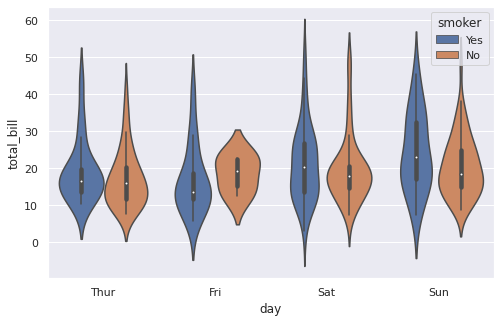

In [ ]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker')
plt.show()

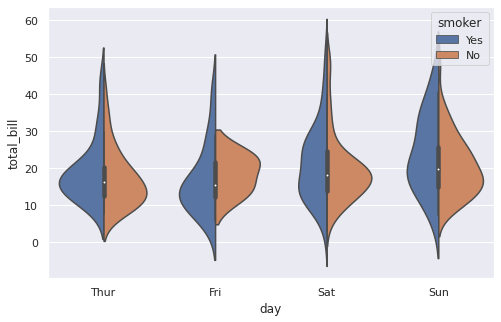

In [ ]:
# hue 옵션으로 분할된 바이올린 플롯을 각각 합치고 싶으시면 split=True를 주면 된다.
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split=True)
plt.show()

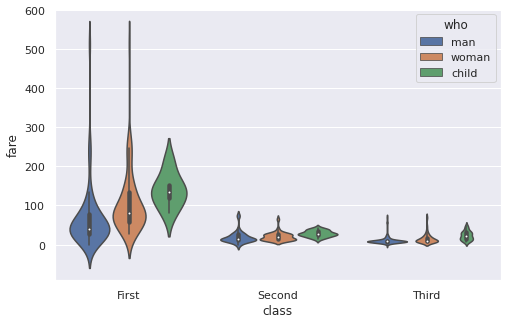

In [ ]:
# hue의 구분 값이 3개 이상이면 split 사용 불가..
# sns.violinplot(x='class', y='fare' ,data=titanic, hue='who', split=True) # error!
sns.violinplot(x='class', y='fare' ,data=titanic, hue='who') # who의 hue는 3개이기 때문에 이렇게 밖에 못봐요!
plt.show()

# 6. lmplot
lmplot은 컬럼간의 **선형관계를 확인하기에 용이하다.**
* outlier도 같이 짐작이 가능! - 하지만 boxplot을 사용하시는게 더 좋아요.

## 6-1. 기본 lmplot

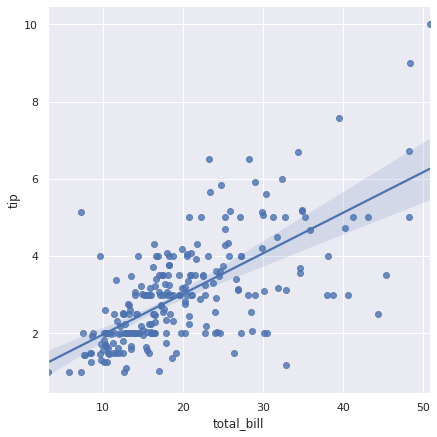

In [ ]:
sns.lmplot(x='total_bill', y='tip', height=6, data=tips)
plt.show()

## 6-2. hue 옵션으로 다중 선형관계 그리기

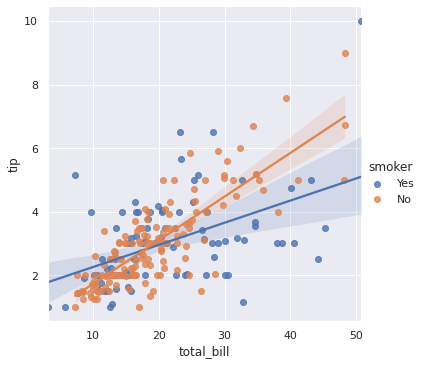

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', height=5, data=tips)
plt.show()

## 6-3. col 옵션 사용해 보기
* col_wrap 옵션을 이용해 한 줄(row)에 표기할 컬럼의 개수 명시 가능

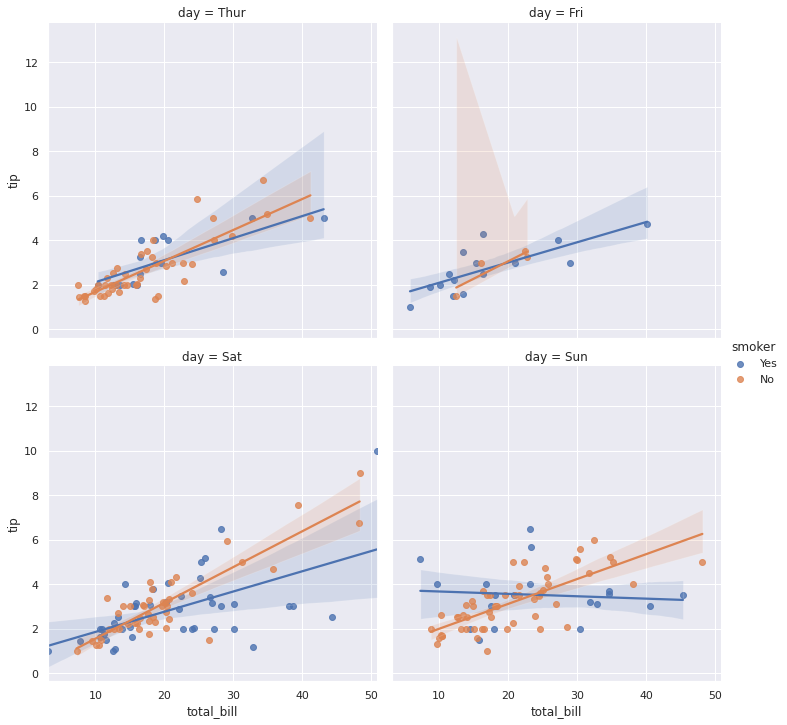

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker',  data=tips, col='day', col_wrap=2)
plt.show()

# 7. relplot
두 컬럼간의 상관관계를 보지만 lmplot 처럼 선형관계를 그려주지는 않는다.
* scatter

## 7-1. 기본 replot

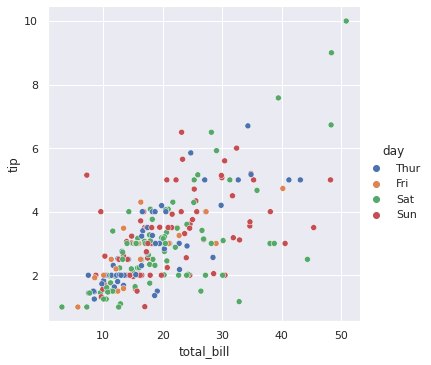

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='day', data=tips)
plt.show()

## 7-2. col 옵션으로 그래프 분할

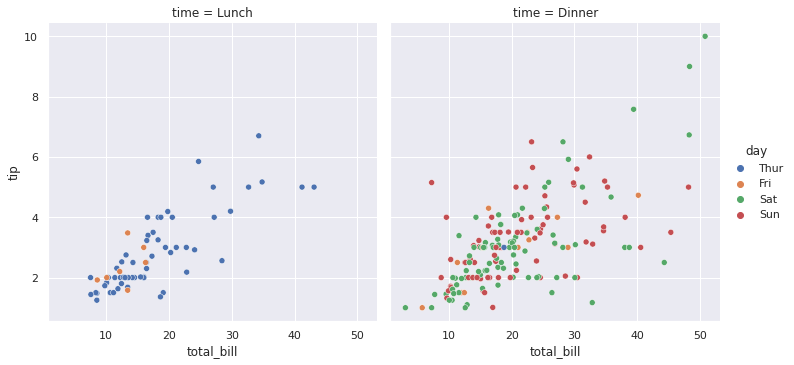

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='day', col='time', data=tips)
plt.show()

## 7-3. 그래프의 row와 column에 표기할 컬럼을 선택

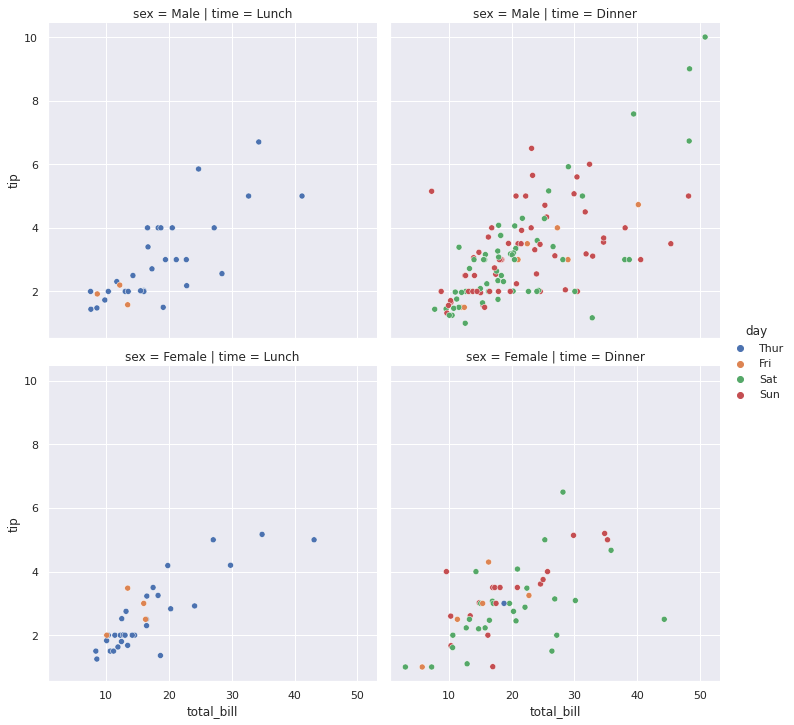

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='day', row='sex', col='time', data=tips)
plt.show()

## 7-4. 컬러 팔레트 적용

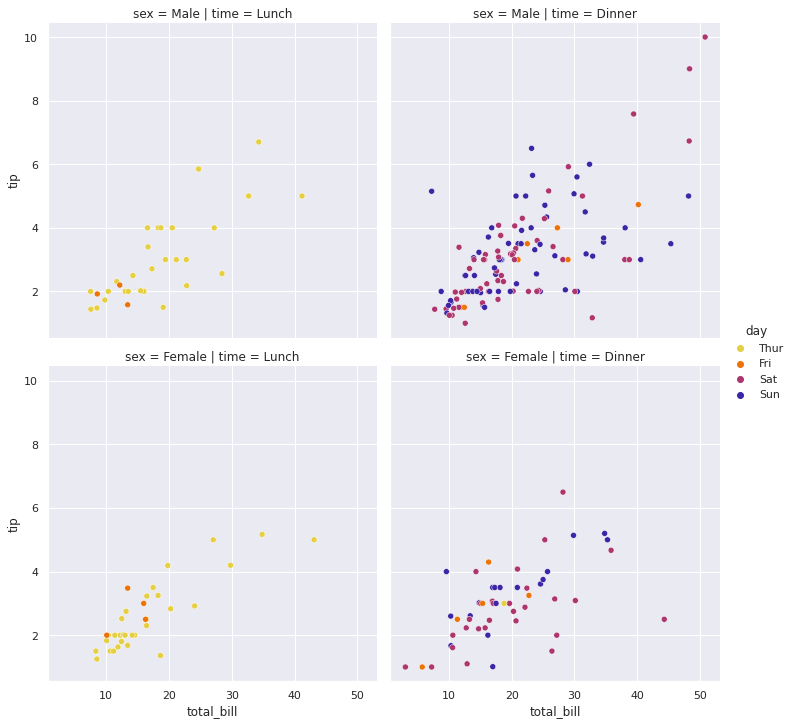

In [ ]:
sns.relplot(x='total_bill', y='tip', hue='day', row='sex', col='time', data=tips, palette='CMRmap_r')
plt.show()

# 8. jointplot
* scatter, histogram을 동시에 그려줍니다.
* 숫자형 데이터만 표현이 가능하다.

## 8-1. 기본 jointplot 그리기

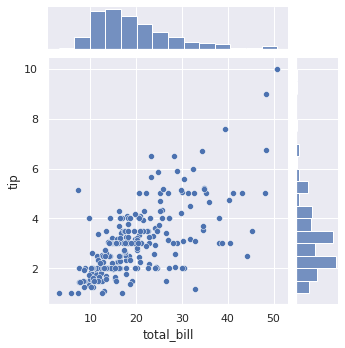

In [ ]:
sns.jointplot(x='total_bill', y='tip', height=5, data=tips)
plt.show()

## 8-2. 선형관계를 표현해주는 regression 라인 그리기
* kind='reg' 옵션 추가

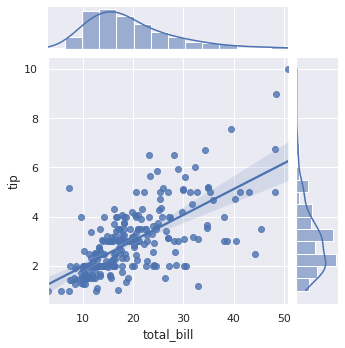

In [ ]:
sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind='reg') # hue 사용 불가
plt.show()

## 8-3. hex 밀도 보기
* kind='hex' 옵션을 이용해 육각형(hex)모양의 밀도 확인

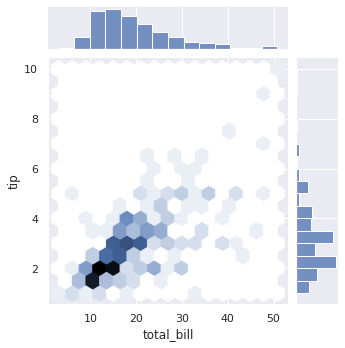

In [ ]:
sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind='hex')
plt.show()

## 8-4. 등고선 모양으로 밀집도 확인하기
* kind='kde' 옵션으로 밀집도를 선으로 확인이 가능

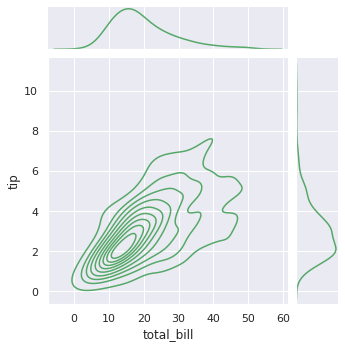

In [ ]:
sns.jointplot(x="total_bill", y="tip", height=5, data=tips, kind='kde', color='g')
plt.show()